In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import mlflow
import mlflow.keras

In [2]:
df= pd.read_csv('forestfires.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# DATA PREPROCESSING

In [4]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [5]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
df.shape

(517, 13)

In [7]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [8]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

In [9]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# SPLIT DATA INTO TRAINING AND TESTING

In [11]:

X = df[["X", "Y", "temp", "RH", "wind", "rain"]]
y = df["area"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input and first hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae']) 
# Fitting training data to model
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50,
                        validation_split=0.2)

C:\Users\shami\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 2614.4131 - mae: 12.6160 - val_loss: 628.0893 - val_mae: 7.1162
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4477.2344 - mae: 13.4861 - val_loss: 623.9561 - val_mae: 7.0650
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2014.6375 - mae: 11.9512 - val_loss: 619.6605 - val_mae: 7.0688
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4492.1670 - mae: 13.4374 - val_loss: 615.2705 - val_mae: 7.0879
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1564.6708 - mae: 9.9887 - val_loss: 610.8629 - val_mae: 7.1223
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2189.1189 - mae: 10.8379 - val_loss: 606.3424 - val_mae: 7.1754
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4408.1191 - mae: 13.4695 - val_loss: 601.4368 - val_mae: 7.2440
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2194.2866 - mae: 13.6682 - val_loss: 596.5947 - val_mae: 7.3609
Epoch 9/100
7/7 ━━━━━━━━━

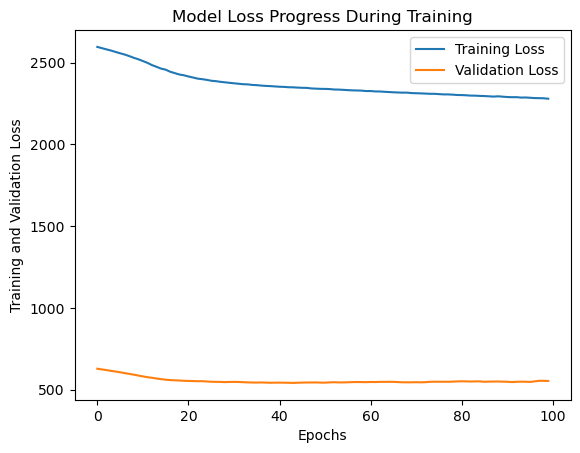

In [13]:
#model evaluation
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [14]:
# Make predictions
y_pred = model.predict(X_test)

# Save the model to a file
model.save("fire_area_model.keras")  # Save the model in HDF5 format

print("Model saved as 'fire_area_model.keras'")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Model saved as 'fire_area_model.keras'


In [15]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the metrics
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 25.782299956335464
Mean Squared Error (MSE): 11575.071247594527
Root Mean Squared Error (RMSE): 107.58750507189265


# MLFLOW 

In [23]:
# Set the experiment name
mlflow.set_experiment("regression_neural_network")
#mlflow.set_tracking_uri('http://127.0.0.1:5000/')

# Start the MLflow run
with mlflow.start_run(run_name='rnn'):
    # Log parameters before training
    mlflow.log_param("optimizer", "adam")
    mlflow.log_param("loss", "mse")
    mlflow.log_param("epochs", 50)
    mlflow.log_param("batch_size", 32)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )

    # Evaluate the model
    test_loss, test_mae = model.evaluate(X_test, y_test)

    # Log metrics after evaluation
    mlflow.log_metric("test_loss", test_loss)
    mlflow.log_metric("test_mae", test_mae)

    # Log the trained model
    mlflow.keras.log_model(model, "regression_model")

    print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4544.0405 - mae: 20.5506 - val_loss: 555.3324 - val_mae: 13.6422
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2097.7065 - mae: 15.8152 - val_loss: 553.7126 - val_mae: 13.4425
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1965.6317 - mae: 16.4010 - val_loss: 564.8372 - val_mae: 13.9635
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1528.2179 - mae: 17.5166 - val_loss: 566.5297 - val_mae: 13.8629
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1132.7393 - mae: 15.0532 - val_loss: 559.1909 - val_mae: 13.5532
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1779.8875 - mae: 16.8528 - val_loss: 555.5775 - val_mae: 13.5809
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2061.4919 - mae: 16.4952 - val_loss: 556.7280 - val_mae: 13.4666
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1706.7319 - mae: 16.5678 - val_loss: 558.3098 - val_mae: 13.6436
Epoch 9/

2024/12/28 02:44:19 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/28 02:44:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Test Loss: 11457.78515625, Test MAE: 26.384777069091797
🏃 View run rnn at: http://127.0.0.1:5000/#/experiments/956566475910209121/runs/9e6a1a307cd34fc09b0ac772f7a471fc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/956566475910209121


# Make a test on the logged model

In [30]:
model_uri = 'runs:/9e6a1a307cd34fc09b0ac772f7a471fc/regression_model'

# Load the model
model = mlflow.pyfunc.load_model(model_uri)
X_test = pd.DataFrame(X_test, columns=["X", "Y", "temp", "RH", "wind", "rain"])
# Define an input example
INPUT_EXAMPLE = X_test.iloc[0].to_dict()

# Convert the input example to a DataFrame
input_df = pd.DataFrame([INPUT_EXAMPLE])

# Validate the serving payload works on the model
prediction = model.predict(input_df)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
         0
0  6.26099
